# Installation

## I don't know what you've installed or how you've installed it, so let's talk before you run any of this.

**OS X folks** can run the following:

* `brew install geos`
* `brew install gdal`
* `brew install spatialindex`
* `pip3 install pillow`
* `pip3 install pysal`
* `pip3 install geopandas`
* `pip3 install https://github.com/matplotlib/basemap/archive/v1.0.7rel.tar.gz`
* `pip3 install rtree`

For **Windows without Anaconda**, [use this guide](http://geoffboeing.com/2014/09/using-geopandas-windows/) to install through `pip` directly from `whl` files.

# Geopandas Usage

## Importing

You'll be importing

* pandas because you love it
* geopandas for geographic stuff
* `Point` from shapely to help convert CSV files into something geopandas can understand

and `%matplotlib inline` for viewing maps, of course.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

## Opening a shapefile

Let's open up the Community Districts data. **What kind of file is it?**

In [3]:
districts = gpd.read_file('Community Districts/districts.shp')

## Introduction to the GeoDataFrame

A GeoDataFrame is *just like a dataframe*, it just... has geographic stuff in it.

In [5]:
districts.head()

,boro_cd,geometry,shape_area,shape_leng
0,311.0,POLYGON ((-73.97299433938896 40.60881414180224...,1.031759e+08,51566.989006
1,412.0,"POLYGON ((-73.80168266553363 40.6663223525709,...",2.673336e+08,65933.851319
2,481.0,"POLYGON ((-73.83591564875908 40.7434308933925,...",4.750313e+07,53795.118705
3,314.0,POLYGON ((-73.95630035122711 40.65504828183116...,8.217567e+07,49291.791502
4,313.0,POLYGON ((-73.98372152615246 40.59582107821707...,8.814953e+07,65746.939737


In [8]:
districts[districts.boro_cd > 400]

,boro_cd,geometry,shape_area,shape_leng
1,412.0,"POLYGON ((-73.80168266553363 40.6663223525709,...",2.673336e+08,65933.851319
2,481.0,"POLYGON ((-73.83591564875908 40.7434308933925,...",4.750313e+07,53795.118705
11,484.0,(POLYGON ((-73.93177580884338 40.5578995623848...,1.237923e+08,247830.043391
12,402.0,"POLYGON ((-73.897923512633 40.75424000267809, ...",1.398945e+08,72182.746967
14,503.0,(POLYGON ((-74.13319580101383 40.5363067420505...,5.990016e+08,189072.053206
16,482.0,"POLYGON ((-73.835900721417 40.71164137076879, ...",2.429264e+07,32007.621257
20,407.0,(POLYGON ((-73.83970053362432 40.7652895884367...,3.283557e+08,139168.786464
26,414.0,(POLYGON ((-73.91192551909782 40.5658138623772...,1.957296e+08,211877.538189
28,410.0,(POLYGON ((-73.85722330984366 40.6502786705413...,1.716549e+08,105187.759482
31,409.0,POLYGON ((-73.81709738756452 40.70402980158765...,1.073240e+08,50763.105913


## Visualizing a shapefile

You can just use `.plot()` to visualize a GeoDataFrame, it's nice and easy.

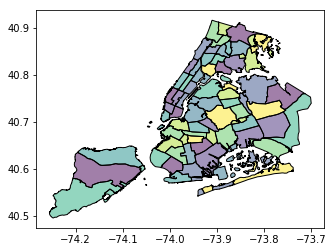

In [9]:
districts.plot()

# Changing the CRS (Coordinatote Reference Systame)
## WAY ONE: Just changinge

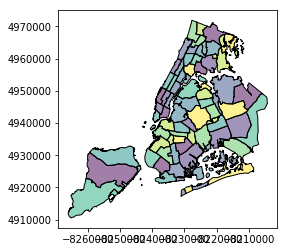

In [11]:
districts.to_crs({'proj': 'merc'}).plot()

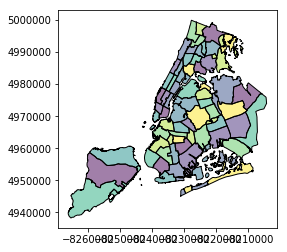

In [13]:
districts.to_crs(epsg=3857).plot()

## Opening a CSV of points

geopandas doesn't understand a CSV file of lat/lon points, so you need to convert each line into shapely geometry, then feed that into a new geo dataframe.

Once you do that, you need to set the `crs` to `{'init': 'epsg:4326'}` so it knows what kind of datum/sphereoid/projection you're measuring from.

**Let's try opening the earthquakes CSV**

In [23]:
# Step 1: Read in your file as a dataframe

df = pd.read_csv("earthquakes_1.0_day.csv")
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-05-03T01:58:56.924Z,59.804800,-136.833500,0.00,3.10,ml,NaN,NaN,NaN,0.59,...,2017-05-03T02:03:56.653Z,"94km WNW of Skagway, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
1,2017-05-03T01:35:24.350Z,39.398167,-120.255501,5.60,2.42,md,21.0,73.0,0.131400,0.05,...,2017-05-03T01:57:52.525Z,"10km NW of Truckee, California",earthquake,0.21,1.00,0.26,19.0,automatic,nc,nc
2,2017-05-03T01:26:38.608Z,59.897000,-136.710900,0.00,2.00,ml,NaN,NaN,NaN,0.82,...,2017-05-03T01:30:12.544Z,"92km WNW of Skagway, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak
3,2017-05-03T01:24:02.260Z,37.246834,-121.635498,2.98,2.57,md,58.0,43.0,0.032380,0.07,...,2017-05-03T01:57:30.367Z,"13km N of Morgan Hill, California",earthquake,0.14,0.34,0.09,63.0,automatic,nc,nc
4,2017-05-03T01:18:05.540Z,38.830166,-122.808166,1.75,1.11,md,17.0,74.0,0.006923,0.02,...,2017-05-03T01:29:04.429Z,"7km W of Cobb, California",earthquake,0.27,0.40,0.08,4.0,automatic,nc,nc


In [17]:
def make_point(row):
    return Point(row.longitude, row.latitude)

# Step 2: Make a list of points using .apply

# Step 3: Make a GeoDataFrame by senxding geometry=points

# Step 4: Set the CRS using .crs = {'init': 'epsg:4326'}

# Step 5: Step back and see 

In [24]:
# Step 2: Make a list of points using .apply
points = df.apply(make_point, axis=1)

In [27]:
# Step 3: Make a GeoDataFrame by sending geometry=points

earthquakes = gpd.GeoDataFrame(df, geometry=points)

# As a CSV file, it does not have a CRS
earthquakes.crs = {'int': 'epsg:4326'}
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2017-05-03T01:58:56.924Z,59.804800,-136.833500,0.00,3.10,ml,NaN,NaN,NaN,0.59,...,"94km WNW of Skagway, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak,POINT (-136.8335 59.8048)
1,2017-05-03T01:35:24.350Z,39.398167,-120.255501,5.60,2.42,md,21.0,73.0,0.131400,0.05,...,"10km NW of Truckee, California",earthquake,0.21,1.00,0.26,19.0,automatic,nc,nc,POINT (-120.2555008 39.3981667)
2,2017-05-03T01:26:38.608Z,59.897000,-136.710900,0.00,2.00,ml,NaN,NaN,NaN,0.82,...,"92km WNW of Skagway, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak,POINT (-136.7109 59.897)
3,2017-05-03T01:24:02.260Z,37.246834,-121.635498,2.98,2.57,md,58.0,43.0,0.032380,0.07,...,"13km N of Morgan Hill, California",earthquake,0.14,0.34,0.09,63.0,automatic,nc,nc,POINT (-121.635498 37.2468338)
4,2017-05-03T01:18:05.540Z,38.830166,-122.808166,1.75,1.11,md,17.0,74.0,0.006923,0.02,...,"7km W of Cobb, California",earthquake,0.27,0.40,0.08,4.0,automatic,nc,nc,POINT (-122.8081665 38.8301659)


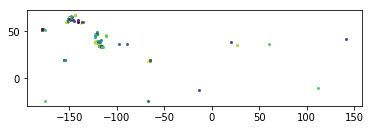

In [26]:
earthquakes.plot()

In [36]:
df = pd.read_csv("earthquakes_1.0_day.csv")
df.head()

def make_point(row):
    return Point(row.longitude, row.latitude)

# lambda: make a one line functions 
points = df.apply(lambda row: Point(row.longitude, row.latitude), axis=1)

earthquakes = gpd.GeoDataFrame(df, geometry=points)

earthquakes.crs = {'int': 'epsg:4326'}
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2017-05-03T01:58:56.924Z,59.804800,-136.833500,0.00,3.10,ml,NaN,NaN,NaN,0.59,...,"94km WNW of Skagway, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak,POINT (-136.8335 59.8048)
1,2017-05-03T01:35:24.350Z,39.398167,-120.255501,5.60,2.42,md,21.0,73.0,0.131400,0.05,...,"10km NW of Truckee, California",earthquake,0.21,1.00,0.26,19.0,automatic,nc,nc,POINT (-120.2555008 39.3981667)
2,2017-05-03T01:26:38.608Z,59.897000,-136.710900,0.00,2.00,ml,NaN,NaN,NaN,0.82,...,"92km WNW of Skagway, Alaska",earthquake,NaN,0.40,NaN,NaN,automatic,ak,ak,POINT (-136.7109 59.897)
3,2017-05-03T01:24:02.260Z,37.246834,-121.635498,2.98,2.57,md,58.0,43.0,0.032380,0.07,...,"13km N of Morgan Hill, California",earthquake,0.14,0.34,0.09,63.0,automatic,nc,nc,POINT (-121.635498 37.2468338)
4,2017-05-03T01:18:05.540Z,38.830166,-122.808166,1.75,1.11,md,17.0,74.0,0.006923,0.02,...,"7km W of Cobb, California",earthquake,0.27,0.40,0.08,4.0,automatic,nc,nc,POINT (-122.8081665 38.8301659)


## Opening a CSV of points using `lambda`

We used `.apply` and a function up above, but that function only does one thing! Let's learn something new called `lambda`, it's a one-line function we can use with `.apply`.

## Using the built-in map

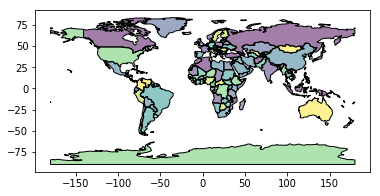

In [37]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

# Styling your visuals

## Setting size, line and shape colors, widths, axes

* `linewidth`
* `color`
* `edgecolor`
* `ax.axis`

Let's plot the community districts!

In [38]:
ax = world.plot(figsize)

NameError: name 'figsize' is not defined

Let's plot the world!

In [ ]:
ax = districts.to_crs(epsg=3857).plot(figsize=(20,5), linewidth=0.25, edgecolor='white', color='lightgray')

## Setting the projection

You can use `to_crs` to convert to different projections. In typical pandas fashion, you can do it a lot of ways, but the easiest is to send a `epsg=` and feed it the correct EPSG code.

You'll also probably want to do an `ax.axis('off')` to turn off the splines and axes!

What are the EPSG codes for some common projections?

## Styling markers

* markersize
* color
* alpha

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

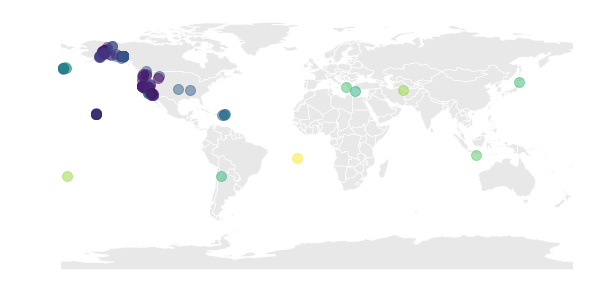

In [52]:
ax = world.plot(color = 'lightgrey', linewidth=0.5, edgecolor = 'white', figsize=(20,5))
earthquakes.plot(markersize=10, alpha=0.5, ax=ax, column='mag')
ax.axis('off')

(-197.99999999999997,
 198.00000000000014,
 -98.682256500000037,
 92.327386500000017)

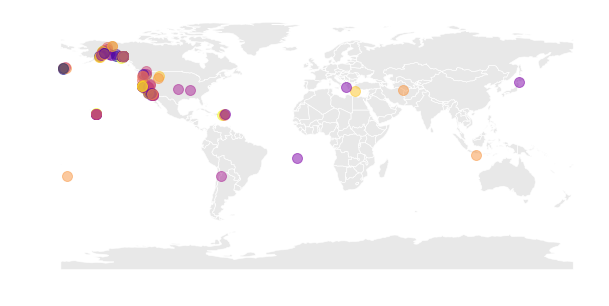

In [51]:
ax = world.plot(color = 'lightgrey', linewidth=0.5, edgecolor = 'white', figsize=(20,5))
earthquakes.plot(markersize=10, alpha=0.5, ax=ax, cmap='plasma')
ax.axis('off')

In [54]:
world.head(2)

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0


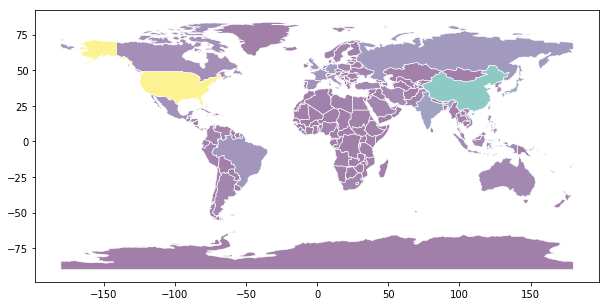

In [58]:
world.plot(linewidth=0.5, edgecolor = 'white', figsize=(20,5), column='gdp_md_est')

# Colormaps/ramps

## Auto colormap

Giving your `plot` a `column` and a `cmap` will colorize your values. You can try `plasma` as your color map, or check out [more here](https://matplotlib.org/examples/color/colormaps_reference.html).

## Auto colormap again

We can also try with the world. What's the `gdp_md_est` column looking like?

## Plotting multiple layers of data

Let's try plotting the earthquakes on top of the world. **Save your first plot as `ax` and send it to the next one as `ax=ax`.**

# Setting the projection by `proj` with named projections

Instead of using an EPSG code, you can also set the projection with `to_crs` by  `.to_crs({'proj': 'merc'})` or something similar.

I don't recommend this method, but it is a little friendlier than EPSG codes.

### Plot the world with the default projection

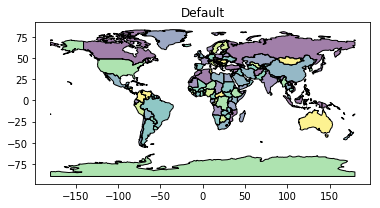

In [59]:
ax = world.plot()
ax.set_title("Default")

### Plot the world with Mercator (merc)

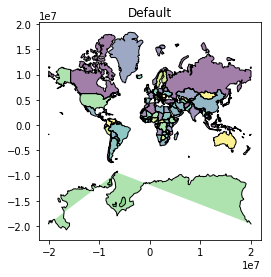

In [61]:
ax = world.to_crs({'proj': 'merc'}).plot()
ax.set_title('Default')

### Plot the world with [Transverse Mercator](https://en.wikipedia.org/wiki/Transverse_Mercator_projection) (tmerc)

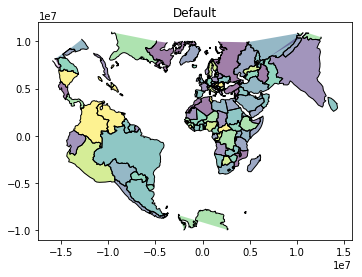

In [62]:
ax = world.to_crs({'proj': 'tmerc'}).plot()
ax.set_title('Default')

### Plot the world with Albers Equal Area (aea)

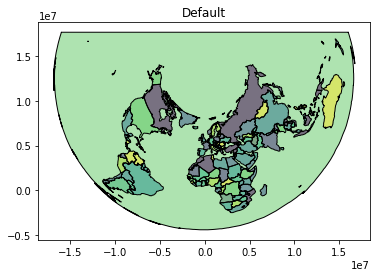

In [63]:
ax = world.to_crs({'proj': 'aea'}).plot()
ax.set_title('Default')

# Spatial join

# Dataset 1: States

Let's import the states and clean them up a little bit. we need to clean the data up a little

In [64]:
# Read in the shapefile from cb_2016_us_state_500k as "states"
states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')

In [ ]:
# Get rid of Guam, Mariana Islands and Virgin Islands
states = states[states.STATEFP.astype(int) < 60]
# Get rid of Hawaii and Alaska
states = states[~states.NAME.isin(['Hawaii', 'Alaska'])]
states.tail(5)

## Dataset 2: Waffle House

Read in `wafflehouses.csv`, and convert it to a GeoDataFrame.

In [66]:
df = pd.read_csv('wafflehouse.csv')

pionts = df.apply(lambda: row: Point(row.long, row.lat), axis=1)

wafflehouse = gdp.GeoDataFrame(df, geometry = points)
wafflehouse.crs = {'init': 'epsg: 4269'}

SyntaxError: invalid syntax (<ipython-input-66-2f49f17a9d87>, line 3)

### Plot the locations, coloring based on the 'score' column.

# The actual spatial join

### Is the CRS of the states the same as the CRS of the Waffle House locations?

In [ ]:
states.crs

In [ ]:
wafflehouses.crs

### If not, we'll force them to match using `.to_crs`

In [ ]:
# Convert CRS to match
converted_states = states.to_crs(wafflehouses.crs)
converted_states.head(2)

### And now we can join

In [ ]:
# http://geopandas.org/mergingdata.html
wafflehouses_with_state_data = gpd.sjoin(wafflehouses, converted_states, how='left', op='within')
wafflehouses_with_state_data.head()

## Doing things with spatially joined data

* What column do we use for color?
* Add a legend with `legend=True`
* Something is going to go wrong, though!

## What if we reverse the spatial join and make it 'contains'?

How is this different than what we did before?

In [ ]:
# http://geopandas.org/mergingdata.html
states_with_wafflehouse_data = gpd.sjoin(converted_states, wafflehouses, how='left', op='contains')
states_with_wafflehouse_data.head()

In [ ]:
select_columns = states_with_wafflehouse_data[['NAME', 'geometry', 'score']]
select_columns.head()

## Aggregating with `.dissolve` (the geographic version of 'groupby')

http://geopandas.org/aggregation_with_dissolve.html

### In theory we'd run the following line

But it doesn't work because we have too much data, and `.dissolve` isn't smart enough to deal with it.

In [ ]:
# We can't do this, I think because there are too many wafflehouses
#wafflehouse_counts = states_with_wafflehouse_data.dissolve(by='NAME', aggfunc='count')
#wafflehouse_counts.head()

### But we can try it out with the first 5/20/50 of them

In [ ]:
%%time
select_columns.head(5).dissolve(by='NAME', aggfunc='count')

In [ ]:
%%time
select_columns.head(20).dissolve(by='NAME', aggfunc='count')

In [ ]:
%%time
select_columns.head(50).dissolve(by='NAME', aggfunc='count')

In [ ]:
%%time
select_columns.head(200).dissolve(by='NAME', aggfunc='count')

## Spatial joins for LARGE data sets (NOT using dissolve)

Instead of using `.dissolve`, we need to use `.contains` to say "find me all of the waffle houses inside of this one specific state". I don't know why this works better, but it does. We'll use `.sum()` to count the number inside, but you could also do something like `['score'].mean()` etc.

### First, let's try it with one state

In [ ]:
states[0]

In [ ]:
state = states[0]
wafflehouses.within(state.geometry).sum()

### Now, let's try it with every state

In [ ]:
# You can use .contains
# counts the true ones
states['wafflehouse_count'] = states.apply(lambda state: wafflehouses.within(state.geometry).sum(), axis=1)
states.head()

In [ ]:
states.plot(column='wafflehouse_count', scheme='quantiles')

In [ ]:
states.plot(column='wafflehouse_count', scheme='equal_interval')

In [ ]:
states.plot(column='wafflehouse_count', scheme='fisher_jenks')

## Spatial joins for SMALLER data sets (YES using dissolve)

If our dataset isn't that big, though, we're fine to use `.dissolve`.

In [ ]:
# Each one is a country
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(10)

See how every country has a continent? We can `.dissolve` to group them together based on continent. It's like groupby, really!

In [ ]:
# But we'll dissolve them so it's only continents
continents = world.dissolve(by='continent', aggfunc='sum')
continents.head()

# Saving the results

You want to look at this stuff in Leaflet, right? For that we'll need to save. Geopandas supports practically _every_ file format you could ever want.

In [ ]:
wafflehouse_with_state_data.to_file('wafflehouses.json', driver='GeoJson')